In [1]:
!sudo apt-get install python3-pip
!pip3 install --upgrade pip
!pip3 install --upgrade setuptools
!pip3 install matplotlib
!pip3 install networkx

[sudo] password for hdoop: 
     |████████████████████████████████| 2.1 MB 1.8 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.2.4
    Uninstalling pip-21.2.4:
      Successfully uninstalled pip-21.2.4
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.4 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: setuptools
    Found existing installation: setuptools 61.3.1
    Uninstalling setuptools-61.3.1:
      Successfully uninstalled setuptools-61.3.1


In [2]:
a="   0    50"
print(a.strip().split())


['0', '50']


0	1
0	2
0	3
1	0
2	0
3	0
4	0
5	0
6	0
7	0
8	0
9	0
10	0
10	11
11	1
12	1
13	1
14	1
15	1
16	1
17	1
18	1
19	1


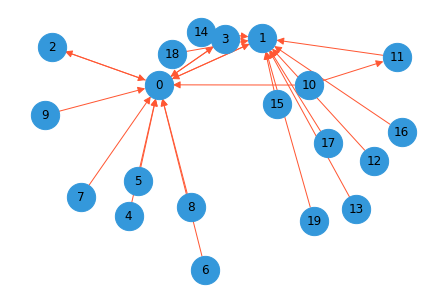

In [3]:
import networkx as nx

edges = []

f = open('../data/twitter_following.txt', 'r')

for line in f.readlines():
    id1, id2 = line.strip().split()
    edges.append((id1,id2))

for e in edges:
    print(f'{e[0]}\t{e[1]}')
# create directed graph from edge pairs using NetworkX Library
G = nx.DiGraph(edges)

# visualize the graph
nx.draw(G, with_labels=True, arrows=True, arrowstyle='-|>', arrowsize=15,
        node_color='#3498DB', node_size=800, 
        edge_color='#FF5733')

In [4]:
mutual_followers = []

for u, v in G.edges():
    if G.has_edge(u,v) and G.has_edge(v,u):
        if (v, u) not in mutual_followers:
            mutual_followers.append((u, v))

# List mutual follower pairs:
print('Các cặp tài khoản theo dõi lẫn nhau:')
for u, v in mutual_followers:
    print(u, '<->', v)


Các cặp tài khoản theo dõi lẫn nhau:
0 <-> 1
0 <-> 2
0 <-> 3
